In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections.abc import Iterable
from matplotlib.patches import Patch  # Per creare elementi di legenda personalizzati

In [2]:
#confronto for-single thread con par_for_sure_n con n_blocchi variabile
def plot_boxplot(data_for, data_par_for_n,title,n_threads,sizegrid):
    fig, ax = plt.subplots(figsize=[10, 8])
    
    boxs = []
    ticks = []
    boxs.append(data_for)
    ticks.append("sequential")
    for i in range(len(data_par_for_n)):
        boxs.append(data_par_for_n[i])
        ticks.append(str(n_threads[i]))

    
    bplot = ax.boxplot(boxs, showfliers=False, patch_artist=True)

    ax.set(xlabel = 'thread (worker)',ylabel = 'Microseconds')
    ax.set_title( title, loc = 'left')
    ax.set_xticks(range(1,1+len(boxs)),ticks)
    ax.set_yscale('log')

    # Colora ogni box
    colors = ['orange'] + ['blue'] * (len(bplot['boxes']) - 1)
    for box, color in zip(bplot['boxes'], colors):
        box.set_facecolor(color)

    # Crea legenda con Patch
    legend_handles = [
        Patch(facecolor='orange', label='grid search seq'),
        Patch(facecolor='blue', label='grid search parallel')
    ]
    ax.legend(handles=legend_handles, loc='upper right')

    plt.figtext(0.63, 0.9, f"threadpool: size_queue({size_queue})\nsize_grid : {sizegrid}\nruns: {len(data_for)}\ngranularity: {granularity}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))
    # --- Print delle mediane dei boxplot ---
    medians = [np.median(d) for d in boxs]
    print("\n=== Median values (µs) ===")
    for label, median in zip(ticks, medians):
        print(f"{label}: {median:.2f}")
    print("===========================\n")

In [3]:
def plot_speedup(data_list,title,n_threads): #primo data in data_list è for normale e poi si compara con quello
    fig, ax = plt.subplots(figsize=[16, 8])

    data_median = [np.median(datum) for datum in data_list] #cambioato uso mediana non media #[np.mean(datum) for datum in data_list]
    speedup = np.zeros(len(n_threads))


    for i in range(len(n_threads)):
        speedup[i] = data_median[0]/data_median[i+1]
        

    ax.plot(n_threads,speedup,'o--')

    ax.legend(['speedup','maximum'])
    ax.set_title(title, loc= 'left')
    ax.set_xticks(n_threads)
    ax.set_xticklabels(n_threads, rotation = 45)


    ax.set(xlabel = 'workers (thread)',ylabel = 'speedup')
    plt.figtext(0.7, 0.9, f"threadpool: size_queue({size_queue})\nsize_grid: {size_grid}\nruns: {len(data_list[0])}\ngranularity: {granularity}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))
    
    # --- Print dei valori di speedup con thread ---
    for n, s in zip(n_threads, speedup):
        print(f"{n} threads -> speedup: {s:.2f}")
    

## prestazioni ggrid search parallel

In [4]:
#a mano settali uguali a come runnato in cluster 
#set parameter
n_runs = 10
n_threads = [1,2,4,8,16] #,32,64]
size_queue = 1024 #hardcome in codice ma qui non conta
granularity = -1
funzione = "rastrigin"



In [7]:
grid_search_200000_seq = [9227 ,9205 ,8970 ,8972 ,8958 ,8906 ,8894 ,8898 ,8913 ,8906 ,8901 ,8902 ,8899 ,8902 ,8899 ,8898 ,8915 ,8912 ,8903 ,8892 ,8898 ,8944 ,8927 ,8899 ,8899 ,8904 ,8953 ,8904 ,8914 ,8890]
grid_search_400000_seq = [17925 ,17903 ,17812 ,17803 ,17808 ,17830 ,17965 ,17887 ,17908 ,17821 ,17816 ,17797 ,17795 ,17959 ,17914 ,18021 ,17877 ,17829 ,17828 ,17815 ,17804 ,17803 ,17809 ,17821 ,17834 ,17816 ,17798 ,17819 ,17815 ,17892]
grid_search_800000_seq = [35731 ,35704 ,35660 ,35653 ,35717 ,35663 ,35675 ,35699 ,35675 ,35634 ,35633 ,35642 ,35718 ,35681 ,35666 ,35674 ,35672 ,35631 ,35650 ,35642 ,35627 ,35635 ,35644 ,35674 ,35686 ,35624 ,35668 ,35681 ,35623 ,35627]
grid_search_1600000_seq = [71418 ,71402 ,71319 ,71473 ,71479 ,71270 ,71254 ,71279 ,71269 ,71286 ,71344 ,71341 ,71301 ,71277 ,71344 ,71306 ,71292 ,71253 ,71305 ,71264 ,71328 ,71282 ,71263 ,71260 ,71286 ,71289 ,71262 ,71333 ,71266 ,71308]
grid_search_3200000_seq = [142679 ,142667 ,142606 ,142594 ,142580 ,142603 ,142541 ,143068 ,142601 ,142513 ,142615 ,142544 ,142540 ,142598 ,142572 ,142548 ,142594 ,142596 ,142613 ,142542]
grid_search_6400000_seq = [285408 ,285297 ,285533 ,285094 ,285083 ,285273 ,285130 ,285076 ,285103 ,285105 ,285123 ,285157 ,285219 ,285155 ,285175 ,285079 ,285471 ,285134 ,285131 ,285220]
grid_search_12800000_seq = [570826 ,570656 ,570329 ,570580 ,570251 ,570435 ,570479 ,570720 ,570533 ,570175 ,570224 ,570446 ,570351 ,570189 ,570601 ,570228 ,570048 ,570214 ,570103 ,570473]
 

# === GRID SIZE 200000 ===
grid_search_200000_thread1 = [8627 ,8460 ,8896 ,8725 ,8847 ,8501 ,8687 ,8758 ,8802 ,8868 ,8851 ,8866 ,8927 ,8878 ,8988 ,8830 ,8941 ,8887 ,8789 ,8906 ,8995 ,8929 ,8632 ,8672 ,8792 ,8813 ,8938 ,8456 ,8592 ,8777]
grid_search_200000_thread2 = [4952 ,4741 ,4431 ,4326 ,4642 ,4495 ,4479 ,4254 ,4399 ,4669 ,4349 ,4453 ,4195 ,4700 ,4335 ,4263 ,4207 ,4466 ,4385 ,4738 ,4295 ,4672 ,4761 ,4197 ,4220 ,4526 ,4622 ,4431 ,4544 ,4656]
grid_search_200000_thread4 = [2569 ,2421 ,2287 ,2349 ,2231 ,2368 ,2454 ,2364 ,2350 ,2265 ,2435 ,2264 ,2559 ,2257 ,2322 ,2273 ,2366 ,2135 ,2246 ,2324 ,2114 ,2386 ,2384 ,2139 ,2132 ,2295 ,2134 ,2124 ,2416 ,2304]
grid_search_200000_thread8 = [2029 ,1426 ,1293 ,1316 ,1427 ,1261 ,1377 ,1122 ,1132 ,1111 ,1115 ,1096 ,1263 ,1344 ,1119 ,1109 ,1104 ,1110 ,1107 ,1319 ,1335 ,1135 ,1294 ,1112 ,1114 ,1112 ,1114 ,1119 ,1272 ,1122]
grid_search_200000_thread16 = [1558 ,978 ,763 ,780 ,678 ,760 ,754 ,718 ,742 ,743 ,794 ,748 ,793 ,687 ,657 ,679 ,773 ,778 ,749 ,711 ,801 ,691 ,685 ,703 ,694 ,780 ,1052 ,736 ,750 ,766]
grid_search_200000_thread32 = []
grid_search_200000_thread64 = []
grid_search_200000_thread96 = []

# === GRID SIZE 400000 ===
grid_search_400000_thread1 = [17036 ,17167 ,17445 ,17172 ,17045 ,17187 ,17399 ,17197 ,17131 ,17476 ,17230 ,17029 ,16709 ,17105 ,17073 ,17447 ,17205 ,17152 ,17450 ,17203 ,16717 ,17210 ,17027 ,17449 ,17196 ,17087 ,17134 ,17496 ,17105 ,17175]
grid_search_400000_thread2 = [8542 ,8983 ,8957 ,8381 ,8586 ,8827 ,8760 ,8565 ,8892 ,9047 ,8837 ,9094 ,8847 ,9011 ,8842 ,9045 ,8752 ,8764 ,8896 ,9013 ,8584 ,8716 ,8608 ,8972 ,8819 ,8437 ,8740 ,8820 ,8729 ,8750]
grid_search_400000_thread4 = [4498 ,4501 ,4497 ,4344 ,4382 ,4527 ,4334 ,4458 ,4554 ,4359 ,4460 ,4327 ,4416 ,4610 ,4346 ,4463 ,4261 ,4422 ,4233 ,4240 ,4323 ,4449 ,4331 ,4635 ,4264 ,4243 ,4313 ,4227 ,4229 ,4295]
grid_search_400000_thread8 = [2477 ,2342 ,2337 ,2198 ,2919 ,2259 ,2367 ,2171 ,2326 ,2404 ,2267 ,2180 ,2178 ,2148 ,2327 ,2395 ,2169 ,2160 ,2184 ,2164 ,2453 ,2410 ,2445 ,2299 ,2364 ,2238 ,2348 ,2203 ,2192 ,2408]
grid_search_400000_thread16 = [1529 ,1206 ,1467 ,1408 ,1429 ,1200 ,1367 ,1437 ,1413 ,1192 ,1199 ,1394 ,1414 ,1463 ,1202 ,1385 ,1443 ,1458 ,1208 ,1617 ,1431 ,1193 ,1206 ,1223 ,1283 ,1426 ,1380 ,1442 ,1447 ,1447]
grid_search_400000_thread32 = []
grid_search_400000_thread64 = []
grid_search_400000_thread96 = []

# === GRID SIZE 800000 ===
grid_search_800000_thread1 = [33738 ,33829 ,34058 ,33916 ,34023 ,33972 ,34148 ,33837 ,33965 ,33966 ,33890 ,33987 ,33903 ,33872 ,34132 ,33833 ,33878 ,33901 ,33960 ,33973 ,34002 ,34059 ,34139 ,34226 ,33948 ,33993 ,33794 ,33785 ,33884 ,34036]
grid_search_800000_thread2 = [17464 ,17003 ,16918 ,17451 ,17128 ,17029 ,16931 ,16892 ,16903 ,16994 ,17421 ,17080 ,17056 ,16940 ,17043 ,17550 ,17165 ,17438 ,17277 ,17421 ,17344 ,17036 ,17649 ,17103 ,17247 ,17369 ,17241 ,17492 ,17336 ,17555]
grid_search_800000_thread4 = [8507 ,8774 ,8635 ,8699 ,8485 ,8706 ,8820 ,8980 ,8899 ,8567 ,8604 ,8417 ,8519 ,8723 ,8636 ,8479 ,8671 ,9097 ,8785 ,8610 ,8442 ,8600 ,8452 ,8718 ,8823 ,8718 ,8568 ,8674 ,8683 ,8723]
grid_search_800000_thread8 = [4549 ,4400 ,4435 ,4515 ,4281 ,4408 ,5258 ,4366 ,4430 ,4273 ,4365 ,5093 ,4368 ,4402 ,4546 ,4344 ,4446 ,4518 ,4586 ,4366 ,4429 ,4267 ,4259 ,4257 ,4334 ,4274 ,4324 ,4418 ,4466 ,4444]
grid_search_800000_thread16 = [2774 ,2269 ,2752 ,2251 ,2260 ,2460 ,2429 ,2432 ,2224 ,2261 ,2728 ,2319 ,2720 ,2738 ,2450 ,2423 ,2240 ,2726 ,2794 ,2701 ,2739 ,2762 ,2742 ,2745 ,2747 ,2774 ,2232 ,2785 ,2705 ,2248]
grid_search_800000_thread32 = []
grid_search_800000_thread64 = []
grid_search_800000_thread96 = []

# === GRID SIZE 1600000 ===
grid_search_1600000_thread1 = [67799 ,67128 ,67638 ,67635 ,67429 ,66945 ,67285 ,67217 ,67096 ,66741 ,67038 ,66881 ,67202 ,67079 ,67248 ,67574 ,67352 ,67426 ,67255 ,67206 ,67132 ,67707 ,67207 ,67141 ,67667 ,67161 ,67077 ,67284 ,67431 ,67270]
grid_search_1600000_thread2 = [34044 ,33814 ,34184 ,33837 ,33875 ,33988 ,34009 ,34099 ,33911 ,33923 ,33856 ,33866 ,33759 ,33916 ,34104 ,33774 ,34032 ,33827 ,34077 ,33818 ,33952 ,33897 ,34144 ,33823 ,34029 ,33822 ,33986 ,33850 ,33889 ,34390]
grid_search_1600000_thread4 = [17270 ,17518 ,17238 ,16901 ,17118 ,17076 ,16775 ,16912 ,16941 ,16988 ,16834 ,17250 ,16790 ,17106 ,17090 ,17301 ,16795 ,17126 ,17040 ,17711 ,17375 ,17027 ,16912 ,16996 ,16887 ,16805 ,16908 ,16845 ,16726 ,17009]
grid_search_1600000_thread8 = [8734 ,8713 ,8711 ,8519 ,8661 ,8544 ,8640 ,8644 ,8508 ,8698 ,8662 ,8441 ,8646 ,8617 ,8482 ,8473 ,8700 ,8472 ,9173 ,8462 ,8494 ,8575 ,8646 ,8503 ,8650 ,8487 ,8621 ,8479 ,8598 ,8620]
grid_search_1600000_thread16 = [4761 ,4566 ,4345 ,4288 ,5287 ,5319 ,5355 ,5338 ,5326 ,5335 ,5300 ,4477 ,5338 ,4512 ,5332 ,4488 ,5392 ,5383 ,4440 ,4422 ,5328 ,5378 ,5374 ,5317 ,4592 ,5332 ,4373 ,5330 ,4444 ,5361]
grid_search_1600000_thread32 = []
grid_search_1600000_thread64 = []
grid_search_1600000_thread96 = []

# === GRID SIZE 3200000 ===
grid_search_3200000_thread1 = [134421 ,134232 ,133939 ,134295 ,133953 ,134060 ,134086 ,133852 ,135329 ,133788 ,134381 ,134103 ,134305 ,134090 ,133965 ,133770 ,134837 ,133637 ,134245 ,133944]
grid_search_3200000_thread2 = [67361 ,67227 ,67408 ,66855 ,67601 ,67098 ,67719 ,67416 ,67489 ,67013 ,67186 ,67458 ,67427 ,67149 ,67274 ,67332 ,67430 ,67471 ,67182 ,67144 ]
grid_search_3200000_thread4 = [34134 ,33722 ,33525 ,33992 ,33940 ,33689 ,33851 ,33590 ,34142 ,33824 ,34088 ,33679 ,33969 ,33542 ,33561 ,33766 ,34302 ,33748 ,33743 ,33543]
grid_search_3200000_thread8 = [17535 ,16966 ,17141 ,17121 ,16865 ,17123 ,20916 ,17082 ,17162 ,17028 ,17037 ,16945 ,17022 ,17192 ,16908 ,16913 ,17173 ,16853 ,17503 ,16963]
grid_search_3200000_thread16 = [9001 ,8727 ,10546 ,10528 ,10536 ,10559 ,10532 ,10568 ,10534 ,10726 ,10584 ,8759 ,10603 ,10533 ,10593 ,10563 ,10580 ,8581 ,9121 ,10570]
grid_search_3200000_thread32 = []
grid_search_3200000_thread64 = []
grid_search_3200000_thread96 = []

# === GRID SIZE 6400000 ===
grid_search_6400000_thread1 = [267073 ,267402 ,267181 ,267658 ,267165 ,267578 ,267268 ,267246 ,267311 ,267366 ,267456 ,267606 ,267084 ,267728 ,267899 ,267325 ,266968 ,267528 ,267114 ,267190]
grid_search_6400000_thread2 = [134265 ,133886 ,134410 ,133885 ,133851 ,134047 ,134268 ,134414 ,134121 ,133895 ,133969 ,134082 ,134271 ,134741 ,134234 ,134030 ,134205 ,134102 ,134171 ,133917]
grid_search_6400000_thread4 = [68533 ,67343 ,67439 ,67117 ,67419 ,67252 ,67065 ,68344 ,67266 ,66968 ,67137 ,67151 ,67506 ,67108 ,67818 ,67181 ,67218 ,67360 ,67146 ,66990]
grid_search_6400000_thread8 = [34168 ,33948 ,34079 ,33747 ,33823 ,33762 ,33924 ,33856 ,33702 ,33904 ,33701 ,34396 ,34161 ,33810 ,33970 ,33711 ,33807 ,34011 ,33984 ,34125]
grid_search_6400000_thread16 = [18009 ,17213 ,20998 ,21074 ,21088 ,20953 ,20984 ,21048 ,21364 ,20985 ,21019 ,20948 ,21270 ,20963 ,20921 ,20885 ,21200 ,21103 ,20972 ,21057]
grid_search_6400000_thread32 = []
grid_search_6400000_thread64 = []
grid_search_6400000_thread96 = []

# === GRID SIZE 12800000 ===
grid_search_12800000_thread1 = [536258 ,534725 ,534124 ,535248 ,534099 ,535897 ,536244 ,533386 ,535073 ,533085 ,533690 ,534104 ,533447 ,533608 ,534836 ,533175 ,534172 ,533872 ,534867 ,534031]
grid_search_12800000_thread2 = [268059 ,267342 ,268121 ,267341 ,266889 ,267594 ,267317 ,267039 ,267071 ,267239 ,266903 ,267108 ,267220 ,267783 ,267500 ,267182 ,267011 ,267511 ,267048 ,267217]
grid_search_12800000_thread4 = [134761 ,134575 ,134619 ,134078 ,133708 ,134689 ,134341 ,135203 ,134459 ,135045 ,134692 ,134891 ,134795 ,135216 ,135111 ,134486 ,134566 ,134410 ,134078 ,134317]
grid_search_12800000_thread8 = [68108 ,68355 ,67922 ,67340 ,67881 ,67362 ,67510 ,67667 ,68776 ,67282 ,68232 ,67409 ,77112 ,67633 ,67632 ,67781 ,67735 ,67459 ,68032 ,67631]
grid_search_12800000_thread16 = [34889 ,33982 ,41867 ,42057 ,41837 ,34146 ,41880 ,42145 ,41829 ,42244 ,41819 ,42288 ,42197 ,41913 ,42097 ,42053 ,41984 ,42268 ,41995 ,41952]
grid_search_12800000_thread32 = []
grid_search_12800000_thread64 = []
grid_search_12800000_thread96 = []


## scalabilità forte


=== Median values (µs) ===
sequential: 570393.00
1: 534114.00
2: 267229.50
4: 134597.00
8: 67701.00
16: 41968.00



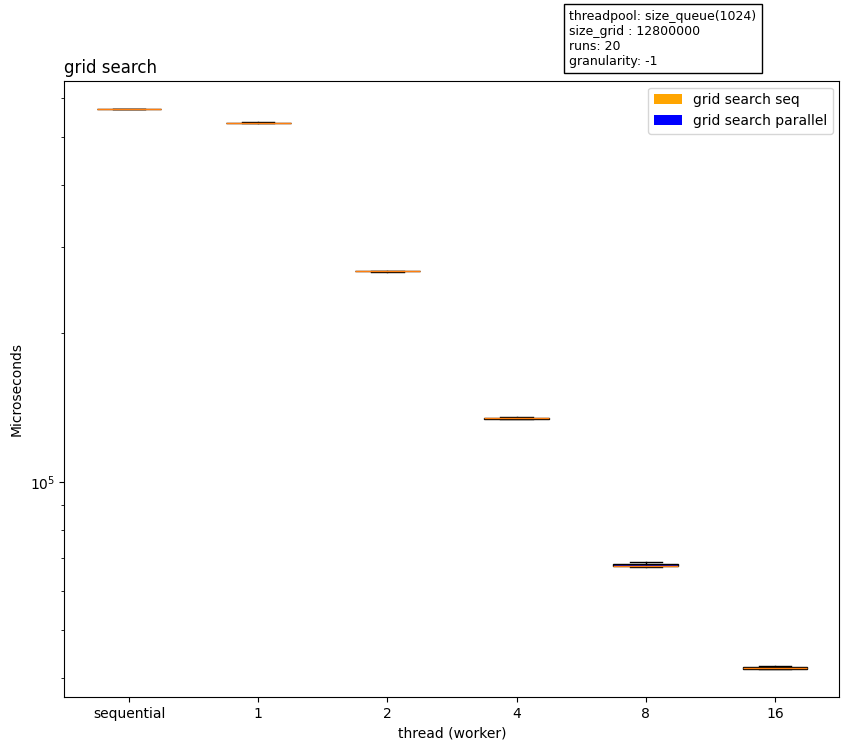

In [12]:
size_grid = 12800000  # puoi cambiare qui
dati_seq = globals()[f"grid_search_{size_grid}_seq"]
dati_parallel = []
for i in n_threads:
    dati_parallel.append(globals()[f"grid_search_{size_grid}_thread{i}"])
plot_boxplot(dati_seq, dati_parallel,"grid search",n_threads, size_grid)

1 threads -> speedup: 1.07
2 threads -> speedup: 2.13
4 threads -> speedup: 4.24
8 threads -> speedup: 8.43
16 threads -> speedup: 13.59


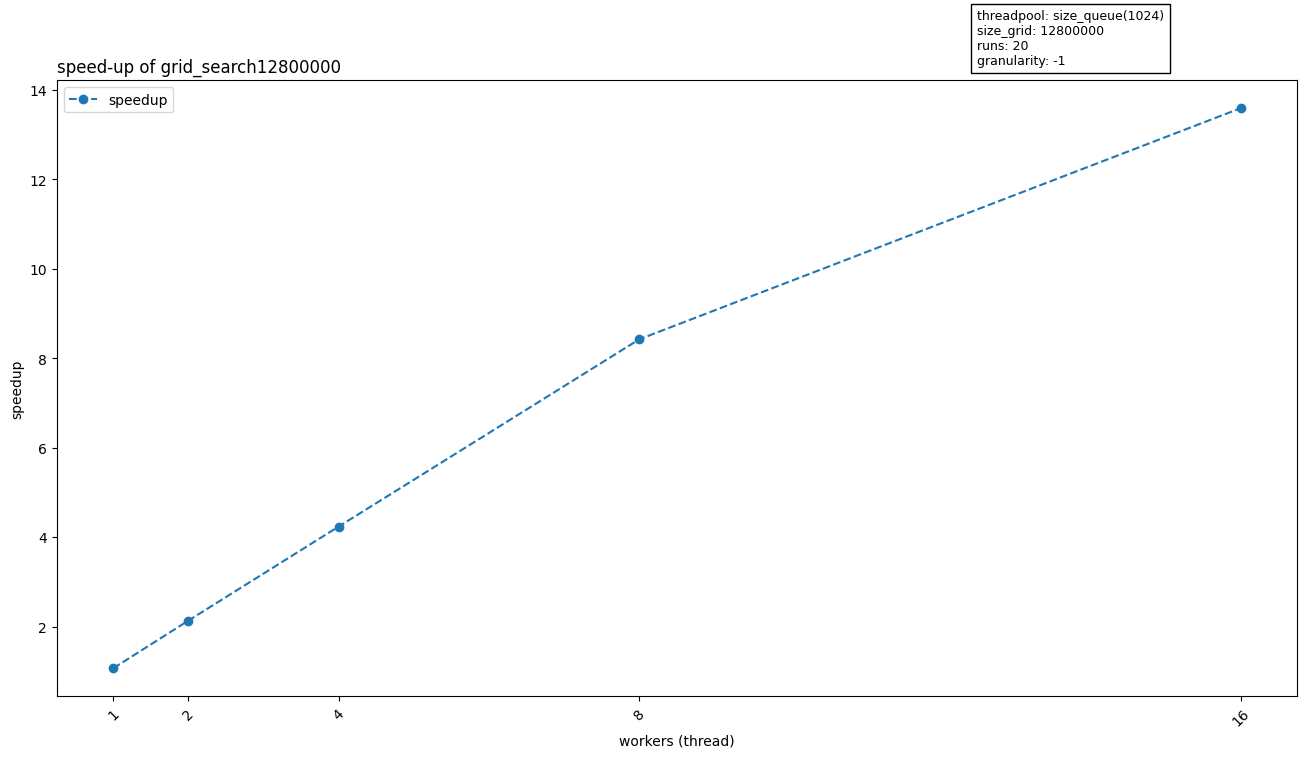

In [13]:
data_list = []
data_list.append(dati_seq)
for i in range(len(n_threads)):
    data_list.append(dati_parallel[i])
plot_speedup(data_list,"speed-up of grid_search"+str(size_grid),n_threads)

## scalabilità debole


In [ ]:
...

## fix thread cambia granularity


In [57]:
def plot_granularity(data_for, data_par_for_n,title):
    fig, ax = plt.subplots(figsize=[10, 8])
    
    boxs = []
    ticks = []
    boxs.append(data_for)
    ticks.append("sequential")
    for i in range(len(data_par_for_n)):
        boxs.append(data_par_for_n[i])
        ticks.append(str(granularity[i]))

    
    bplot = ax.boxplot(boxs, showfliers=False, patch_artist=True)

    ax.set(xlabel = 'granularity',ylabel = 'Microseconds')
    ax.set_title( title, loc = 'left')
    ax.set_xticks(range(1,1+len(boxs)),ticks)
    ax.set_yscale('log')

    # Colora ogni box
    colors = ['orange'] + ['blue'] * (len(bplot['boxes']) - 1)
    for box, color in zip(bplot['boxes'], colors):
        box.set_facecolor(color)

    # Crea legenda con Patch
    legend_handles = [
        Patch(facecolor='orange', label='for'),
        Patch(facecolor='blue', label='parallel_for')
    ]
    ax.legend(handles=legend_handles, loc='upper right')

    plt.figtext(0.63, 0.9, f"threadpool: n_thread({n_thread}), size_queue({size_queue})\nsize_grid : {sizegrid}\nruns: {len(data_for)}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))
    
    # --- Print delle mediane dei boxplot ---
    medians = [np.median(d) for d in boxs]
    print("\n=== Median values (µs) ===")
    for label, median in zip(ticks, medians):
        print(f"{label}: {median:.2f}")
    print("===========================\n")

In [58]:
def plot_speedup_granularity(data_list,title,gran): #primo data in data_list è for normale e poi si compara con quello
    fig, ax = plt.subplots(figsize=[16, 8])

    data_median = [np.median(datum) for datum in data_list]
    speedup = np.zeros(len(gran))


    for i in range(len(gran)):
        speedup[i] = data_median[0]/data_median[i+1]
        

    #print(data_list)
    #print(data_mean)
    gran = gran[::-1]
    speedup = speedup[::-1]
    ax.plot(gran,speedup,'o--')

    ax.legend(['speedup'])
    ax.set_title(title, loc= 'left')
    ax.set_xticks(gran)
    ax.set_xticklabels(gran, rotation = 45)


    ax.set(xlabel = 'graularity'+str(gran),ylabel = 'speedup')
    plt.figtext(0.7, 0.9, f"threadpool: n_thread({n_thread}), size_queue({size_queue})\nsize_grid: {size_grid}\nruns:{len(data_list[0])}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))
    
    # --- Stampa degli speedup ---
    print("\n=== Speedup values ===")
    for g, s in zip(gran, speedup):
        print(f"Granularity {g}: speedup = {s:.2f}")
    print("=====================\n")

In [53]:
granularity = [1000000,100000,10000,1000] 
size_grid = 6000000
n_thread = 6
size_queue = 1024 #hardcode ma tanto qui inutile

In [21]:
#run manualmente seq,   nruns sizegrid  (for per calcolo speedup)
!./run_optimization.sh 3 6000000

In [28]:
#run manualmente parallel cambiando granularity,   nruns sizegrid n_thread granularity 
!./run_optimization_parallel_fixthread_granularity.sh 3 6000000 6 1000000 

In [65]:
dati_seq = []
dati_seq =np.genfromtxt("test_optimization_sizegrid"+str(size_grid)+".txt",delimiter=',',dtype=int)[:-1]
dati_par = []
for i,nb in enumerate(granularity):
    dati_par.append(np.genfromtxt("test_optimization_sizegrid"+str(size_grid)+"_thread"+str(n_thread)+"_granularity"+str(nb)+".txt",delimiter=',',dtype=int)[:-1])


=== Median values (µs) ===
sequential: 267298.50
1000000: 77303.00
100000: 70268.50
10000: 72489.50
1000: 80876.50



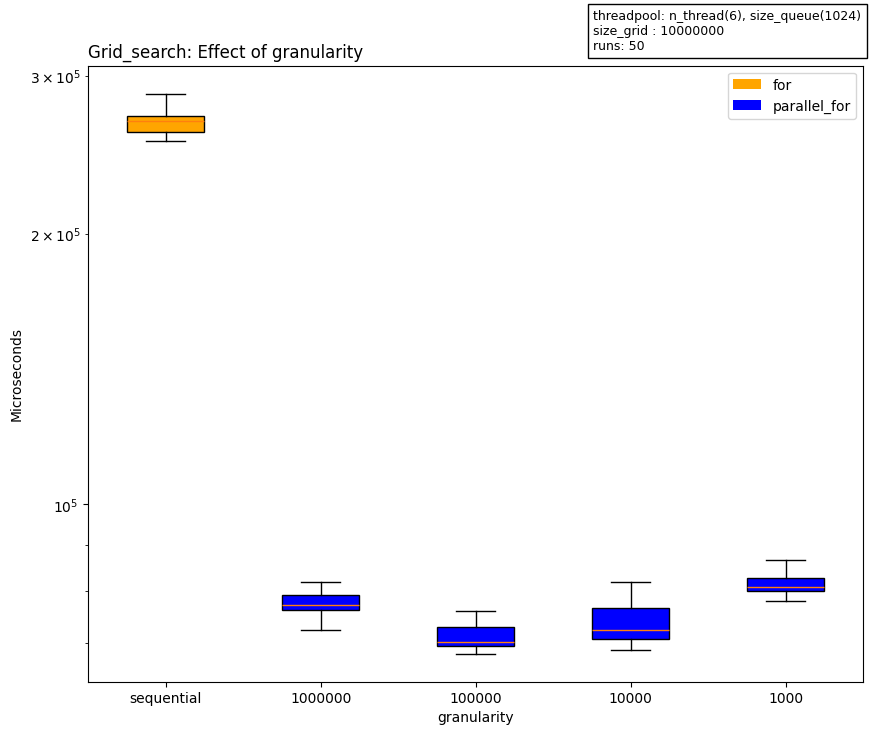

In [66]:
plot_granularity(dati_seq,dati_par,"Grid_search: Effect of granularity")


=== Speedup values ===
Granularity 1000: speedup = 3.31
Granularity 10000: speedup = 3.69
Granularity 100000: speedup = 3.80
Granularity 1000000: speedup = 3.46



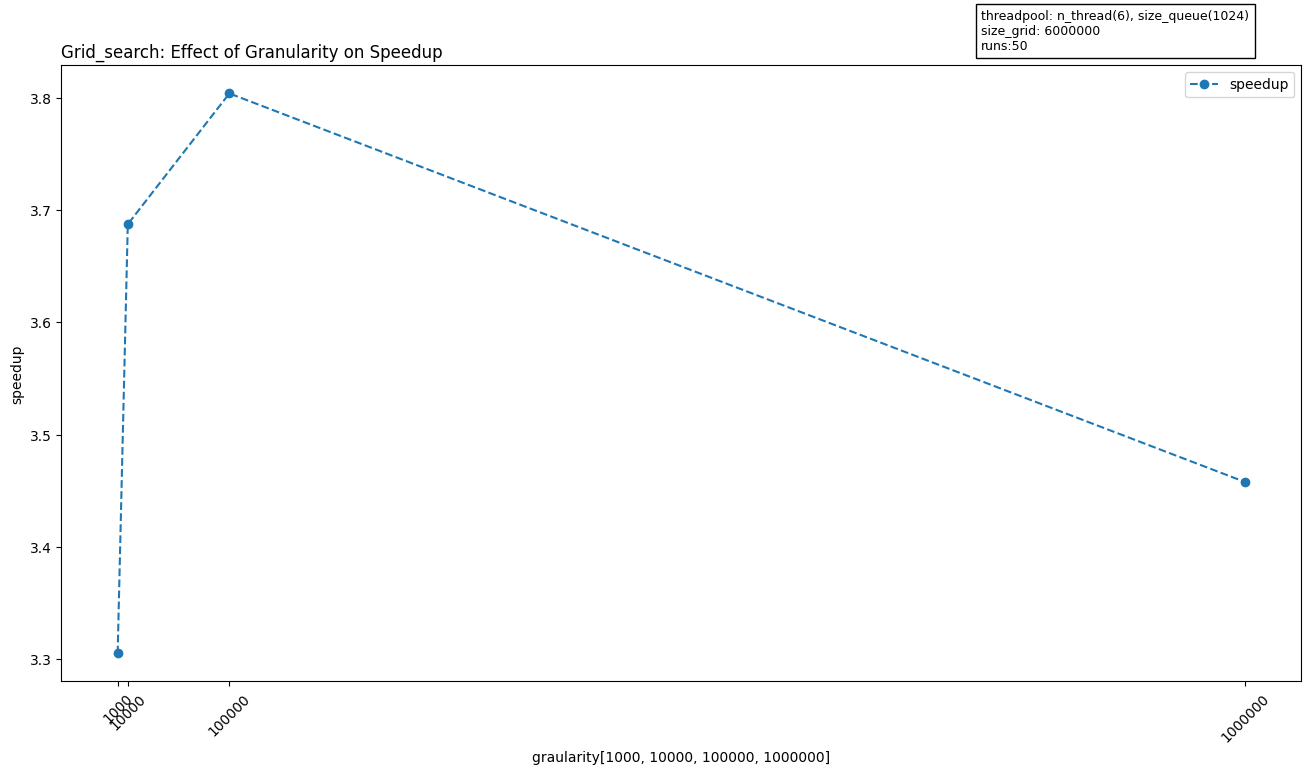

In [67]:
data_list = []
data_list.append(dati_seq)
for i,n in enumerate(granularity):
    data_list.append(dati_par[i])
plot_speedup_granularity(data_list,"Grid_search: Effect of Granularity on Speedup",granularity)